<a href="https://colab.research.google.com/github/MANYI-anewbird/775/blob/main/assignment2_part1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

**Note**: You are **ALLOWED** to use Generative AI for this notebook, but you must properly cite your usage. Be sure to review the syllabus for details on citation requirements and the consequences of failing to cite your sources correctly or simply copy-pasting without meaningful engagement.

# Movie Review Classification



In this notebook, we analyze the [IMDB Movie Reviews dataset](https://huggingface.co/datasets/ajaykarthick/imdb-movie-reviews) and perform various data analysis and machine learning tasks.



In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Loading the dataset

In [ ]:
#### DO NOT CHANGE THIS CODE ###
import pandas as pd

splits = {'train': 'train.jsonl', 'test': 'test.jsonl'}

# Load both train and test datasets
df_train = pd.read_json("hf://datasets/ajaykarthick/imdb-movie-reviews/" + splits["train"], lines=True).sample(frac=0.1, random_state=42)
df_test = pd.read_json("hf://datasets/ajaykarthick/imdb-movie-reviews/" + splits["test"], lines=True).sample(frac=0.1, random_state=42)

### ✅ Remove duplicates across both datasets but keep them separate ###
# Add a 'dataset' column to identify where each row came from
df_train["dataset"] = "train"
df_test["dataset"] = "test"

# Concatenate datasets temporarily
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Remove duplicates across both datasets based on 'review'
df_combined.drop_duplicates(subset=['review'], inplace=True, ignore_index=True)

# Split them back into train and test sets
df_train = df_combined[df_combined["dataset"] == "train"].drop(columns=["dataset"])
df_test = df_combined[df_combined["dataset"] == "test"].drop(columns=["dataset"])

# Reset indices
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df_train

,review,label
0,"Seriously, I can't imagine how anyone could fi...",1
1,I disliked Frosty returns and this one. Both o...,1
2,"This was such a terrible film, almost a comedy...",1
3,"When I first rented Batman Returns, I immediat...",0
4,I am quite the Mitchell Leisen fan so it was a...,0
...,...,...
3992,This is one of the most overlooked gems Hollyw...,0
3993,I saw only the first part of this series when ...,0
3994,David Duchovny and Michelle Forbes play a youn...,0
3995,I watched SCARECROWS because of the buzz surro...,1


In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997 entries, 0 to 3996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3997 non-null   object
 1   label   3997 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB
None


# Questions

## Question 1: Classifying The Reviews

Your entertainment company needs a model to classify reviews as **positive** or **negative**.  

Your team debated between two approaches: a traditional **frequentist NLP method** and a more advanced **neural network-based method**. You decided to compare them in terms of **performance, speed, and interpretability** (i.e., how well the model explains why a review is classified as positive or negative).  

Specifically, you will compare:  
- **Bag-of-Words (BoW)** approach  **(1 Point)**
- **Mean GloVe embeddings** approach **(1 Point)**

#### **Tasks:**  
- Experiment with different text-cleaning and preprocessing techniques, among other model hyperparameters, to optimize each approach.  **(1 Point)**
- Summarize your results in a table.  **(1 Point)**
- Which model performed better? Explain based on theoretical concepts discussed in class.  **(1 Point)**
- Use [`import time`](https://stackoverflow.com/questions/7370801/how-do-i-measure-elapsed-time-in-python) to measure execution. Place it at the first line of a cell.  
- For interpretability, you may want to use [`mglearn.tools.visualize_coefficients`](https://medium.com/towards-data-science/how-a-simple-algorithm-classifies-texts-with-moderate-accuracy-79f0cd9eb47)
- For classification, use `LogisticRegression` from `sklearn`.

### Text cleaning

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
ps = PorterStemmer()

In [ ]:
def cleanup_text(sentence):
  # First, word tokenize.
  #tokenized_sms_messages = tokenizer.tokenize(sentence)
  tokenized_sms_messages = word_tokenize(sentence)

  # Lower case
  tokenized_sms_messages = [word.lower() for word in tokenized_sms_messages]

  # Remove punctuation
  tokenized_sms_messages = [word for word in tokenized_sms_messages if word not in string.punctuation]

  # Remove stop words
  tokenized_sms_messages = [word for word in tokenized_sms_messages if word not in stop_words]

  # put it back together
  tokenized_sms_messages = TreebankWordDetokenizer().detokenize(tokenized_sms_messages)

  return tokenized_sms_messages

In [ ]:
df_train['review'] = df_train['review'].apply(cleanup_text)
df_train.head()

,review,label
0,seriously can't imagine anyone could find sing...,1
1,disliked frosty returns one films absurd poorl...,1
2,terrible film almost comedy sketch noir film.t...,1
3,first rented batman returns immediately though...,0
4,quite mitchell leisen fan great anticipation r...,0


### Method 1: BoW Approach

In [ ]:
import time
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#model

start_time = time.time()

cv = CountVectorizer()
X = cv.fit_transform(df_train['review'])
y = df_train['label']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)

# fit
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# end time
end_time = time.time()

accuracy = accuracy_score(y_test, y_pred)

print(f"Execution Time: {end_time - start_time:.2f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")

Execution Time: 3.94 seconds
Test Accuracy: 0.8375


**Interpretability of BoW**

In [ ]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 27.0 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import mglearn
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'tfidf-cofficient')

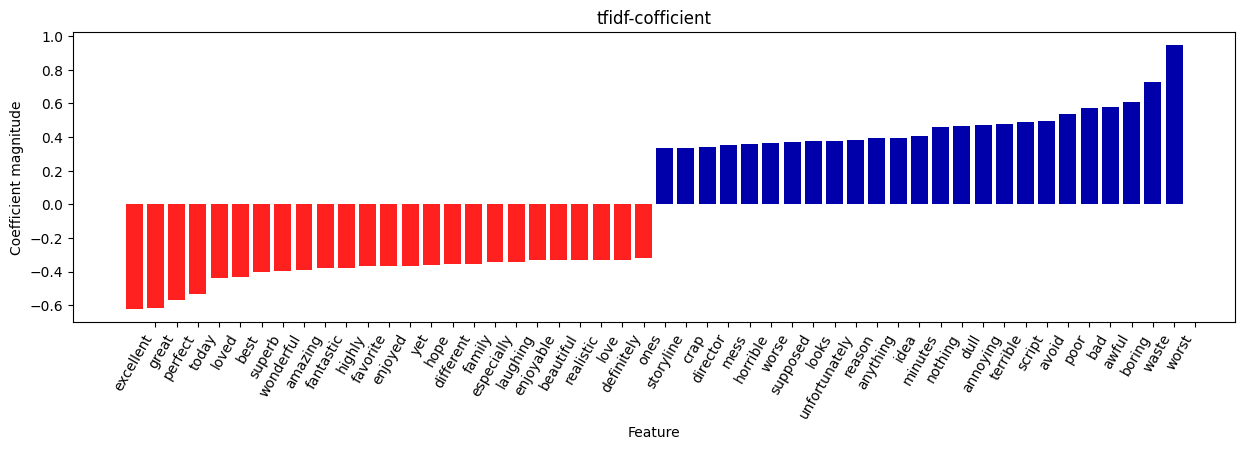

In [ ]:
from sklearn.linear_model import LogisticRegression
import mglearn
import matplotlib.pyplot as plt

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(clf, param_grid, scoring="roc_auc", cv=5)
logreg_train = grid.fit(X_train, y_train)


mglearn.tools.visualize_coefficients(
    grid.best_estimator_.coef_,
    feature_names=cv.get_feature_names_out(),
    n_top_features=25
)

plt.title("tfidf-cofficient")


### Method 2: Mean Glove Approach

In [ ]:
import gensim.downloader as api
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Load the pretrained model
start_time =time.time()

pretrained_model = api.load('glove-wiki-gigaword-50')
vector_size = pretrained_model.vector_size  # Get the embedding size
tokenized_reviews = df_train["review"]
embeddings = list(map(
    lambda tokenized_review: np.mean(
        [pretrained_model[word] for word in tokenized_review if word in pretrained_model],
        axis=0
    ) if len(tokenized_review) > 0 else np.zeros(vector_size),
    tokenized_reviews
))
X = np.stack(embeddings)
y = df_train["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
end_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
print(f"Execution Time: {end_time - start_time:.2f} seconds")
print(f"Accuracy: {accuracy:.4f}")

[==================================================] 100.0% 66.0/66.0MB downloaded
Execution Time: 62.83 seconds
Accuracy: 0.5863


In [ ]:
tokenized_reviews

,review
0,seriously can't imagine anyone could find sing...
1,disliked frosty returns one films absurd poorl...
2,terrible film almost comedy sketch noir film.t...
3,first rented batman returns immediately though...
4,quite mitchell leisen fan great anticipation r...
...,...
3992,one overlooked gems hollywood ever produced--y...
3993,saw first part series debuted back late 90's r...
3994,david duchovny michelle forbes play young jour...
3995,watched scarecrows buzz surrounding well can't...


### Result

### Table

In [ ]:
results = pd.DataFrame({
    "Method": ["BoW", "GloVe"],
    "Accuracy": [0.8375, 0.5863],
    "Execution Time (s)": [8.88, 26.98],
})
results

,Method,Accuracy,Execution Time (s)
0,BoW,0.8375,8.88
1,GloVe,0.5863,26.98


 **Answers:**  

*01 The BoW achieved 83.75% accuracy, significantly outperforming GloVe.
02 BoW took 8.88 seconds, while GloVe took 26.98 seconds, meaning GloVe is slower.*

**GenAI:**

01 used for understanding, polishing the code and identifying the problem of my code.

02 understand how to create a table

## Question 2: Clustering The Reviews


Another colleague suggests that classification may be unnecessary. *Why bother with labeled data when clustering could achieve the same result?*, he said.  

Using **K-Means clustering** with **Mean GloVe embeddings** **(1 Point)**, test whether you can automatically separate positive and negative reviews based on their content and without labels.

- Visualize the clusters using **PCA**.  **(0.5 Point)**
- Compare the clusters to the original sentiment labels.  **(1 Point)**



K-Means Clustering Accuracy on Test Set: 0.5088


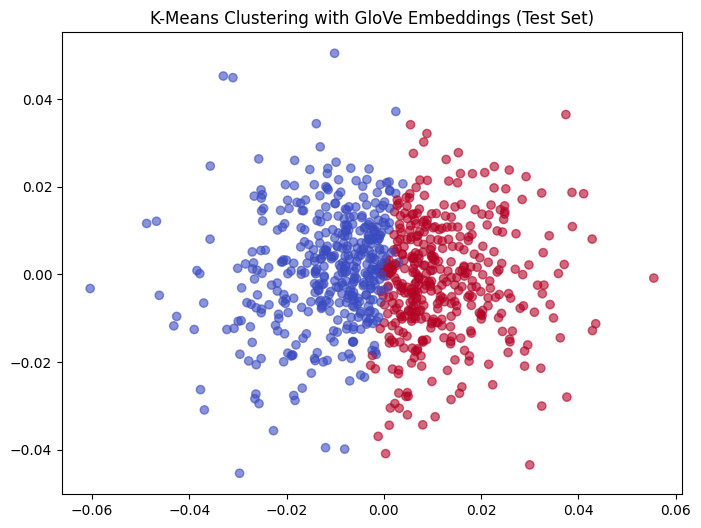

In [ ]:
import gensim.downloader as api

# Load the pretrained model
pretrained_model = api.load('glove-wiki-gigaword-50')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from scipy.stats import mode

vector_size = pretrained_model.vector_size  # Get the embedding size

tokenized_reviews = df_train["review"]
embeddings = np.array([
    pretrained_model.get_mean_vector(review) if len(review) > 0 else np.zeros(vector_size)
    for review in tokenized_reviews
])


X = np.stack(embeddings)
y = df_train['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_train_pred = kmeans.fit_predict(X_train)

# test
y_test_pred = kmeans.predict(X_test)

## I don't know why I use the code based on professor's code, just change the mehod, and it got error, so
## I ask chagpt, it showed some adjustments, I already understood the logics of this
def align_clusters(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(2):
        mask = (y_pred == i)
        if np.any(mask):
            mode_label = mode(y_true[mask], keepdims=True).mode
            labels[mask] = mode_label[0] if mode_label.size > 0 else 0
    return labels

y_test_pred_aligned = align_clusters(y_test, y_test_pred)

# accuract
accuracy = accuracy_score(y_test, y_test_pred_aligned)

# pac
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)


plt.figure(figsize=(8, 6))
print(f"K-Means Clustering Accuracy on Test Set: {accuracy:.4f}")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_pred_aligned, cmap='coolwarm', alpha=0.6, vmin=0, vmax=1)
plt.title("K-Means Clustering with GloVe Embeddings (Test Set)")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_aligned)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=["Predicted Negative", "Predicted Positive"],index=["Actual Negative", "Actual Positive"])
display(conf_matrix_df)

,Predicted Negative,Predicted Positive
Actual Negative,212,192
Actual Positive,201,195


**Answer:**

The accuracy is only 50.8%, means K-Means was not successful in finding structure in the data. What's more, compare with the method above, it didn't perform well, based on its confusion matrix, we can see that it lack of the balance for the result is more to positive

**GenAI:**

01 identify the code issue I faced

02 Provide the adjusted code and problem solving ideas

##Question 3: Pre-trained Model Approach

After testing various approaches, another colleague suggests trying a **[state-of-the-art pre-trained model](https://huggingface.co/l3cube-pune/marathi-sentiment-political-tweets)** that has been generating a lot of buzz.  

Your task is to apply this model to movie reviews **(1 Point)** and evaluate whether it **truly outperforms** the previous approaches.

- **Explicitly state any assumptions you make.**  **(0.5 Point)**
- **Does this model actually surpass the previous models?** Support your answer with empirical results.  **(1 Point)**

**A GPU runtime type is required when solving this question.**  



In [ ]:
### DO NOT CHANGE THIS CODE##
from transformers import pipeline

pipe = pipeline("text-classification", model="l3cube-pune/marathi-sentiment-political-tweets", truncation=True)

pipe(["I love this movie. It is really sooo amazing", "This is an OK movie",  "This is a bad movie"])

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/950M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'Positive', 'score': 0.9982530474662781},
 {'label': 'Neutral', 'score': 0.9951198101043701},
 {'label': 'Negative', 'score': 0.9968762397766113}]

In [ ]:
pipe(df_train["review"].iloc[0])

[{'label': 'Negative', 'score': 0.8741989135742188}]

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def assess_model_bert(df, model):
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(df["review"], df["label"], test_size=0.2, random_state=42)

    # Predict on the test data
    y_pred = model(X_test.to_list())
    y_pred = [1 if x["label"].lower() == "positive" else 0 for x in y_pred]


    # Evaluate the model
    accuracy2 = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    print(f"Accuracy: {accuracy2}")
    print(f"F1 Score: {f1}")
    print(classification_report(y_test, y_pred))

    display(pd.DataFrame(
        confusion_matrix(y_test, y_pred, normalize="true"),
        columns=["Predicted Positive", "Predicted Negative"],
        index=["Actual Positive", "Actual Negative"]
    ))

assess_model_bert(df_train, pipe)


Accuracy: 0.505
F1 Score: 0.0
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       404
           1       0.00      0.00      0.00       396

    accuracy                           0.51       800
   macro avg       0.25      0.50      0.34       800
weighted avg       0.26      0.51      0.34       800



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Predicted Positive,Predicted Negative
Actual Positive,1.0,0.0
Actual Negative,1.0,0.0


**Answer:**

**01 Explicitly state any assumptions you make**

 -- The pre-trained model has been trained on a general sentiment analysis dataset and is assumed to be directly applicable to movie review classification without additional fine-tuning.

 -- The model's output labels ("positive"/"negative") are assumed to directly map to the dataset labels (1/0).

 -- Accuracy and F1-score are assumed to be sufficient evaluation metrics for model performance, without the need for additional metrics like AUC-ROC or Precision-Recall.

**02** The pre-trained model achieved an accuracy of 50.5%, which is significantly lower than the BoW model which is 83.75% and also slightly worse than the GloVe model which is 58.63%. What's more, The pre-trained model has an F1-score of 0, meaning it fails to correctly classify the positive segment, making it unreliable for this task.


## GenAI statement:
I wrote down the goal of using GPT below each question, here is the link that show what I chat with GPT.

https://chatgpt.com/share/67be4d72-5b00-8003-8cd7-5ee7ef4393b5